# Bayesian Inference of COVID-19 Cases Evolution in Catalonia

## A Bayesian Approach to Understanding the Spread of the Pandemic.

**Authors:** Robert Torrell Belzach, Nabil El Bachiri

**Date:** 16/05/2024

---

## Abstract

This report describes the initial study results of applying a Bayesian approach to define a Statistical model that explains the spread, damage and effects of the contagious COVID-19 virus though the whole Catalonial territory and society.
The objective of such analysis is to extract how such disease spreads on the population and try to infer what parameters affected more on the efficacy and damage of the virus. By understanding the most influential parameters, we could suggest what improvements and decisions could the Catalonial society take in such health crisis to minimze the negative effects of it.

---

## Introduction

The COVID pandemic has been a historical crisis that has put in check our modern society, left us with horrible damage but united the whole human civilization to try to study, contain and erradicate this dangerous desease. Unique to this pandemic has been the intense and succesful recollection of enormous data related to this virus and the crisis by the scientific community, an international collaboration that granted us lots of interesting insights and informative empirical observations of the nature of a infectious desease, either on the spead and damage of the desease though society but also on the repercussions of it in all levels of our lifes: Health, economic, psychological and even cultural effects and even aftermarks related to this.

In this project, we will try to find interesting insighs on this data and define, using a Bayesian approach, a statistical model that describes how such desease spreads and affects society and, in this case, on the whole Catalonial territory and it's citizens. 
By doing such "post-crisis" analysis, we could extract useful information that could helps us prevent the potentially horrible damage of such another desease arises on our world again. To observe on what we endured, we can improve our society and be better prepared for whatever dangers appear in the future.

From now on, the "COVID desease spread", "COVID damage on society" and the "Other effects of the COVID pandemic on the Catalonial society" will all be considered the "Phenomenons" to study.

## Objective

Specifically, this project will try to:
- Obtain useful empirical datasets that show us the COVID spread and effects on the Catalonial territory and society durign the emergency pandemic period.
  - Perform an initial data exploration process to better understand the properties of the data at hand.
  - Perform the necessary data cleanup, normalization and data preprocess if necessary to better model and process the phenomenons.
- Design different Bayesian models, with increasing complexity on the Hierarchical Bayesian Model structure to try to obtain a valid explanation of the phenomenons.
  - We will try to justify the different Prioris on the models that can reasonably adjust to what could be expected on the desease and the effects
  - Our ideal objective is to develop a single, complex but informative Hierarchical Bayesian Model that explains all three phenomenons and the relation between them.
- Formulate different hypothesis on the phenomenons and try to answer the truthfullness of them with the Inferred Posterior Distribution of the designed models.


## Data exploration

As all data science project, we need to begin the implementation of our computations with the import of our datasets. For this project, we have found a lot of repositories online from hundreds of public institutions that has openly published the data they have recollected about the pandemic. Thanks to their efforts, we will perform our study with millions of observations.

The complete list of data sources has been indexed in the Bibliography section of this report, but summarized, the data comes from these sources:

- Data on the evolution of the virus:
- Data on the damages to society of the virus:
- Data on the repercussions of the pandemic:
- Data on the actions taken by society on the pandemic:

Even though we have compiled all this data, the first models we'll create will only take into account the evolution of the virus, and the more complex models will take the necessary extra data. The data exploration will take into account all the present data.

We will first import all the data as independent Pandas dataframes, each for every CSV file.

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import math 
import numpy as np
import scipy as sp
import pandas as pd

import nest_asyncio
nest_asyncio.apply()

df_casos_comarques_trimestral = pd.read_csv('./Datasets/casos_comarques_trimestral.csv')
df_casos_municipi_trimestral = pd.read_csv('./Datasets/casos_municipi_trimestral.csv')

df_defuncions_comarques_mensual = pd.read_csv('./Datasets/defuncions_comarca_mensual.csv')
df_defuncions_comarques_trimestral = pd.read_csv('./Datasets/defuncions_comarques_trimestral.csv')

df_vacunes_comarques_mensual = pd.read_csv('./Datasets/vacunes_comarques_mensual.csv')

df_mobilitat_comarques_setmanal = pd.read_csv('./Datasets/mobilitat_provincies_setmanal_v3.csv', delimiter=";")



In [2]:
df_vacunes_comarques_mensual[380:400]

,mes,comarques i Aran,concepte,sexe,estat,valor
380,12/2020,Cerdanya,població vacunada amb segona dosi (%),total,NaN,0.0
381,12/2020,Cerdanya,població vacunada amb dosi addicional (%),homes,NaN,0.0
382,12/2020,Cerdanya,població vacunada amb dosi addicional (%),dones,NaN,0.0
383,12/2020,Cerdanya,població vacunada amb dosi addicional (%),total,NaN,0.0
384,12/2020,Conca de Barberà,dosis administrades,homes,NaN,1.0
385,12/2020,Conca de Barberà,dosis administrades,dones,NaN,2.0
386,12/2020,Conca de Barberà,dosis administrades,total,NaN,3.0
387,12/2020,Conca de Barberà,persones vacunades amb primera dosi,homes,NaN,1.0
388,12/2020,Conca de Barberà,persones vacunades amb primera dosi,dones,NaN,2.0
389,12/2020,Conca de Barberà,persones vacunades amb primera dosi,total,NaN,3.0


In [3]:
df_casos_comarques_trimestral.head()

,trimestre,comarques i Aran,concepte,sexe,estat,valor
0,T1/2020,Alt Camp,casos confirmats,homes,NaN,36.0
1,T1/2020,Alt Camp,casos confirmats,dones,NaN,39.0
2,T1/2020,Alt Camp,casos confirmats,total,NaN,75.0
3,T1/2020,Alt Camp,casos per cada 100 habitants,homes,NaN,0.2
4,T1/2020,Alt Camp,casos per cada 100 habitants,dones,NaN,0.2


In [4]:
df_casos_municipi_trimestral.head()

,trimestre,municipis,concepte,sexe,estat,valor
0,T1/2020,Abrera,casos confirmats,homes,NaN,16.0
1,T1/2020,Abrera,casos confirmats,dones,NaN,17.0
2,T1/2020,Abrera,casos confirmats,total,NaN,33.0
3,T1/2020,Abrera,casos per cada 100 habitants,homes,NaN,0.3
4,T1/2020,Abrera,casos per cada 100 habitants,dones,NaN,0.3


In [5]:
df_defuncions_comarques_mensual.head()

,mes,comarques i Aran,concepte,estat,valor
0,03/2020,Alt Camp,defuncions,NaN,10
1,03/2020,Alt Empordà,defuncions,NaN,2
2,03/2020,Alt Penedès,defuncions,NaN,22
3,03/2020,Alt Urgell,defuncions,NaN,3
4,03/2020,Alta Ribagorça,defuncions,NaN,0


In [6]:
df_defuncions_comarques_trimestral.head()

,trimestre,comarques i Aran,concepte,sexe,estat,valor
0,T1/2020,Alt Camp,defuncions,homes,NaN,6.0
1,T1/2020,Alt Camp,defuncions,dones,NaN,4.0
2,T1/2020,Alt Camp,defuncions,total,NaN,10.0
3,T1/2020,Alt Camp,defuncions per cada 1.000 habitants,homes,NaN,0.3
4,T1/2020,Alt Camp,defuncions per cada 1.000 habitants,dones,NaN,0.2


In [7]:
df_vacunes_comarques_mensual.head()

,mes,comarques i Aran,concepte,sexe,estat,valor
0,12/2020,Alt Camp,dosis administrades,homes,NaN,7.0
1,12/2020,Alt Camp,dosis administrades,dones,NaN,34.0
2,12/2020,Alt Camp,dosis administrades,total,NaN,41.0
3,12/2020,Alt Camp,persones vacunades amb primera dosi,homes,NaN,7.0
4,12/2020,Alt Camp,persones vacunades amb primera dosi,dones,NaN,34.0


In [8]:
df_mobilitat_comarques_setmanal.head()

,Total Nacional,Comunidades y Ciudades Aut�nomas,Provincias,Islas,Tipo de dato,Periodo,Total
0,Total Nacional,Catalu�a,Barcelona,NaN,Porcentaje de poblaci�n que sale del �rea,29/12/2021,"17,87"
1,Total Nacional,Catalu�a,Barcelona,NaN,Porcentaje de poblaci�n que sale del �rea,26/12/2021,"12,26"
2,Total Nacional,Catalu�a,Barcelona,NaN,Porcentaje de poblaci�n que sale del �rea,22/12/2021,"22,1"
3,Total Nacional,Catalu�a,Barcelona,NaN,Porcentaje de poblaci�n que sale del �rea,19/12/2021,15
4,Total Nacional,Catalu�a,Barcelona,NaN,Porcentaje de poblaci�n que sale del �rea,15/12/2021,"24,76"


In [9]:
def transform_by_concepte(df, index):
    pivot_df = df.pivot_table(index=index, columns='concepte', values='valor', aggfunc='sum')
    pivot_df.reset_index(inplace=True)
    return pivot_df

def reorder_quarter(quarter):
    q, year = quarter.split('/')
    return f"{year}/{q}"

def reorder_quarter_df(df, index_str):
    df[index_str] = df[index_str].apply(reorder_quarter)
    df = df.sort_values(by=index_str).reset_index(drop=True)

def parse_date_to_quarter(df, index):
    df['mes'] = df['mes'].apply(lambda x: str(x.split('/')[0]) + '/T' + str(math.trunc(int(x.split('/')[1]) - 1) // 3 + 1) )
    
    df = df.groupby(['mes', 'comarques i Aran', 'concepte']).agg({'valor': 'mean'}).reset_index()

    df = transform_by_concepte(df, index)

    #df_quarterly = df.groupby(['mes', 'comarques i Aran', 'concepte', 'sexe']).agg({'valor': 'sum'}).reset_index()
    
    return df

In [10]:

df_casos_comarques_trimestral_total = df_casos_comarques_trimestral.drop(columns=['estat'])[df_casos_comarques_trimestral["sexe"] == "total"]
df_casos_municipi_trimestral_total = df_casos_municipi_trimestral.drop(columns=['estat'])[df_casos_municipi_trimestral["sexe"] == "total"]
df_defuncions_comarques_trimestral_total = df_defuncions_comarques_trimestral.drop(columns=['estat'])[df_defuncions_comarques_trimestral["sexe"] == "total"]
df_vacunes_comarques_mensual_total = df_vacunes_comarques_mensual.drop(columns=['estat'])[df_vacunes_comarques_mensual["sexe"] == "total"]

reorder_quarter_df(df_casos_comarques_trimestral_total, 'trimestre')
reorder_quarter_df(df_casos_municipi_trimestral_total, 'trimestre')
reorder_quarter_df(df_defuncions_comarques_trimestral_total, 'trimestre')
reorder_quarter_df(df_vacunes_comarques_mensual_total, 'mes')

df_vacunes_comarques_trimestral_total = parse_date_to_quarter(df_vacunes_comarques_mensual_total, ["comarques i Aran", "mes"])
df_vacunes_comarques_trimestral_total.rename(columns={'mes': 'trimestre'}, inplace=True)

df_casos_comarques_trimestral_total = transform_by_concepte(df_casos_comarques_trimestral_total, ["comarques i Aran", "trimestre"])
df_casos_municipi_trimestral_total = transform_by_concepte(df_casos_municipi_trimestral_total, ["municipis", "trimestre"])
df_defuncions_comarques_trimestral_total = transform_by_concepte(df_defuncions_comarques_trimestral_total, ["comarques i Aran", "trimestre"])
df_comarques_trimestral_total = pd.merge(df_casos_comarques_trimestral_total, 
                                                     df_defuncions_comarques_trimestral_total, 
                                                     on=['comarques i Aran', 'trimestre'], how='outer')


merge_columns = df_vacunes_comarques_trimestral_total.columns.difference(df_comarques_trimestral_total.columns)

df_comarques_trimestral_total = pd.merge(df_comarques_trimestral_total, 
                                                     df_vacunes_comarques_trimestral_total, 
                                                     on=['comarques i Aran', 'trimestre'], how='left').round(2)

df_comarques_trimestral_total[merge_columns] = df_comarques_trimestral_total[merge_columns].fillna(0)

In [11]:
df_comarques_trimestral_total.head()

concepte,comarques i Aran,trimestre,casos confirmats,casos per cada 100 habitants,defuncions,defuncions per cada 1.000 habitants,dosis administrades,dosis administrades per cada 100 persones,persones vacunades amb dosi addicional,persones vacunades amb primera dosi,persones vacunades amb segona dosi,població vacunada amb dosi addicional (%),població vacunada amb primera dosi (%),població vacunada amb segona dosi (%)
0,Alt Camp,2020/T1,75.0,0.2,10.0,0.2,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Alt Camp,2020/T2,93.0,0.2,21.0,0.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,Alt Camp,2020/T3,277.0,0.6,2.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,Alt Camp,2020/T4,932.0,2.1,14.0,0.3,41.0,0.10,0.0,41.0,0.0,0.0,0.1,0.0
4,Alt Camp,2021/T1,838.0,1.9,22.0,0.5,4136.0,9.23,0.0,2921.0,1215.0,0.0,6.5,2.7


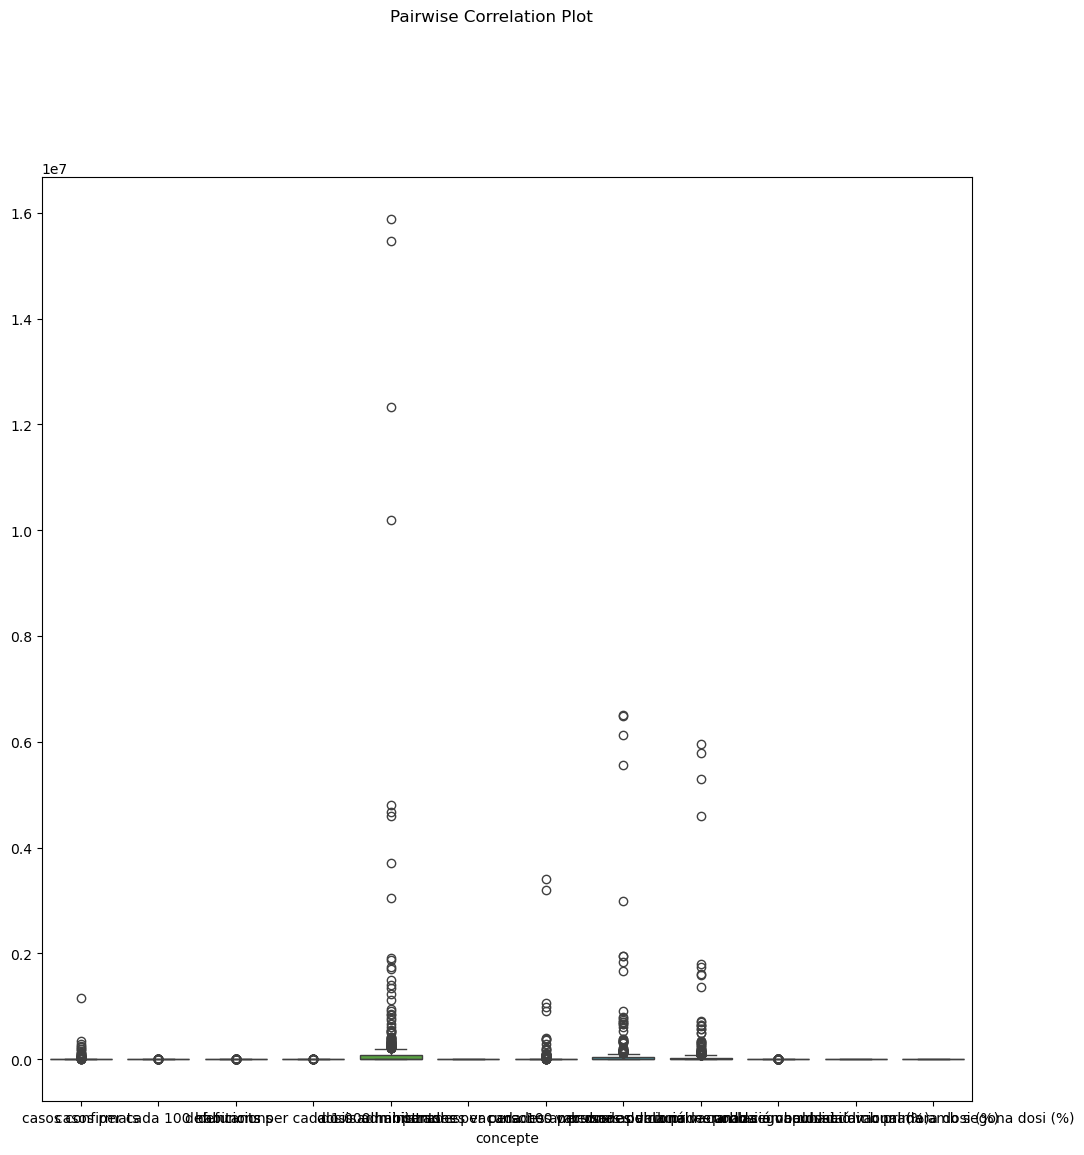

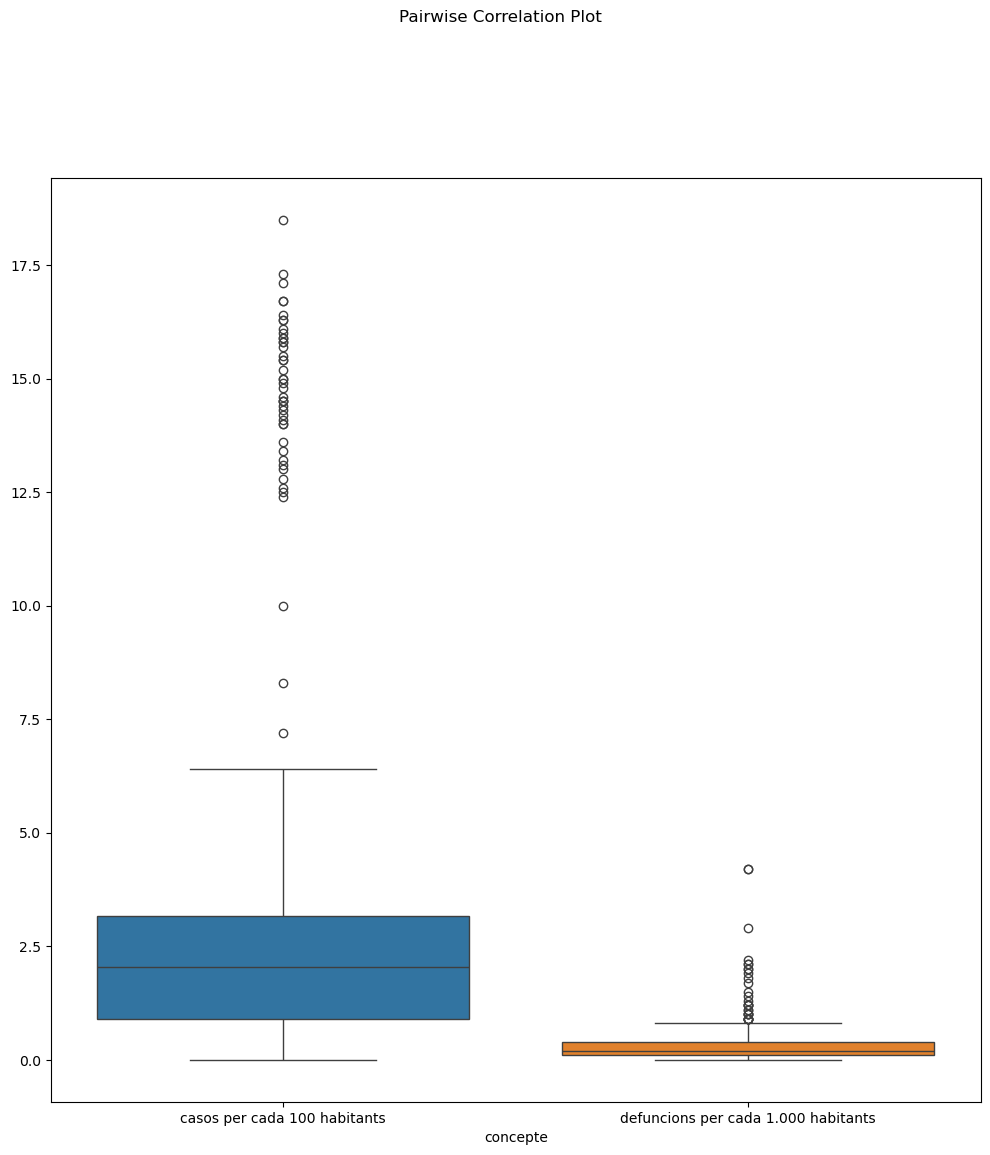

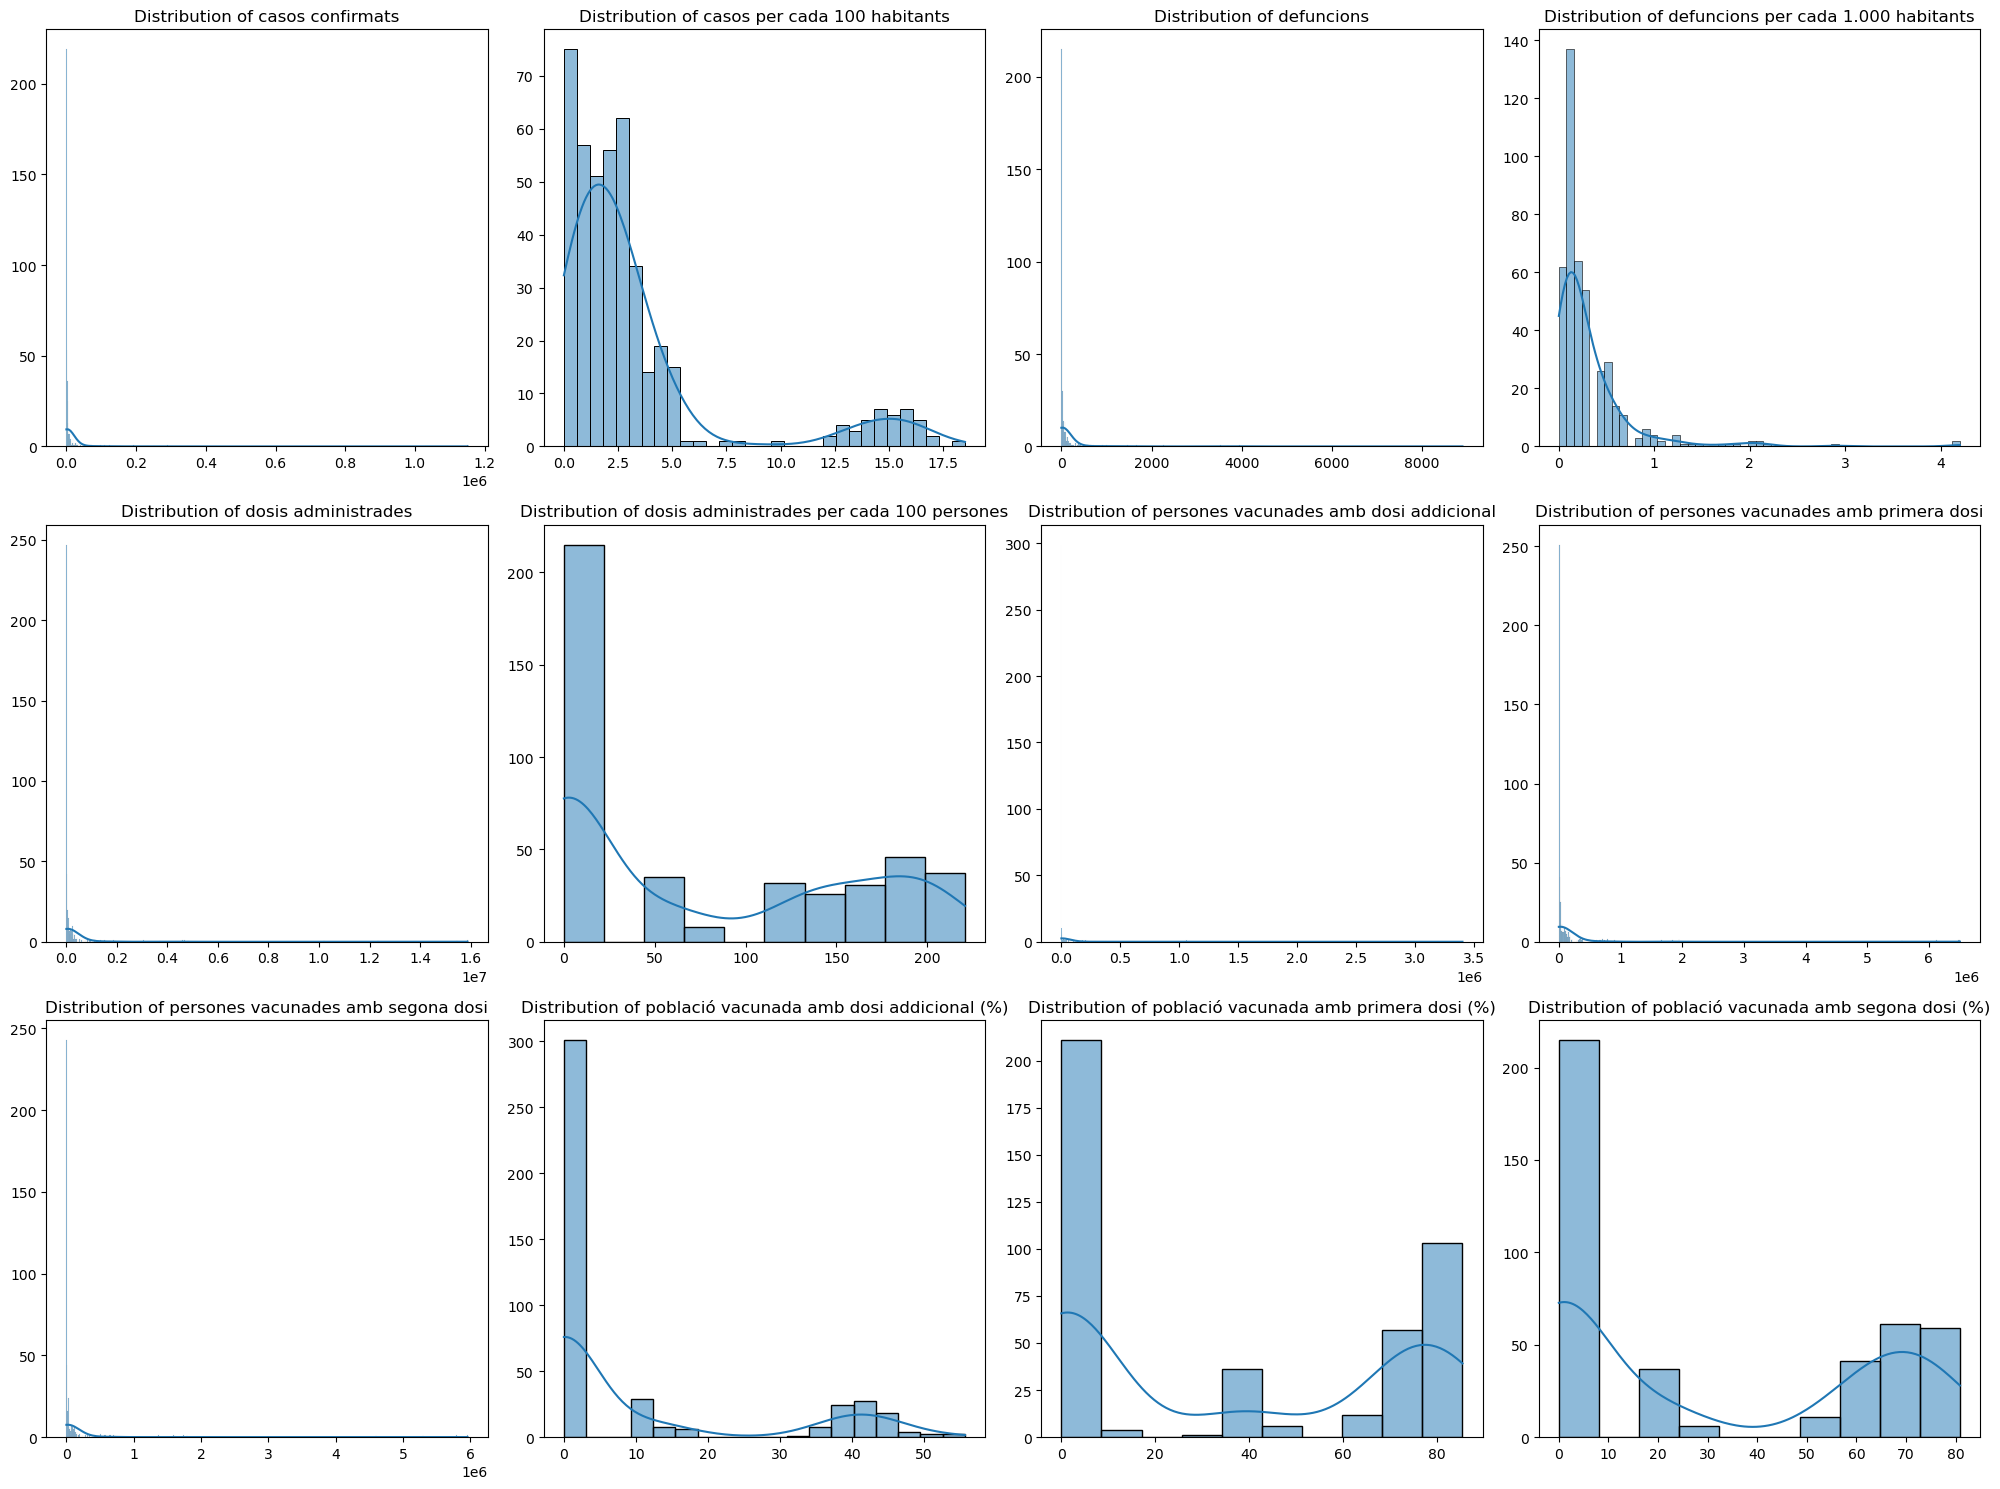

In [12]:


numerical_columns = [
    'casos confirmats', 
    'casos per cada 100 habitants', 
    'defuncions', 
    'defuncions per cada 1.000 habitants', 
    'dosis administrades', 
    'dosis administrades per cada 100 persones', 
    'persones vacunades amb dosi addicional', 
    'persones vacunades amb primera dosi', 
    'persones vacunades amb segona dosi', 
    'població vacunada amb dosi addicional (%)', 
    'població vacunada amb primera dosi (%)', 
    'població vacunada amb segona dosi (%)'
]

numerical_columns_rel = [
    'casos per cada 100 habitants', 
    'defuncions per cada 1.000 habitants'
]

def do_plots_exploration():
    plt.figure(figsize=(12, 12))
    sns.boxplot(df_comarques_trimestral_total[numerical_columns])
    plt.suptitle('Pairwise Correlation Plot', y=1.02)
    plt.show()
    
    plt.figure(figsize=(12, 12))
    sns.boxplot(df_comarques_trimestral_total[numerical_columns_rel])
    plt.suptitle('Pairwise Correlation Plot', y=1.02)
    plt.show()
    
    # Determine the number of columns for the subplot grid
    n_cols = 4
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_columns):
        sns.histplot(df_comarques_trimestral_total[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

do_plots_exploration()



/home/riibber/miniforge3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


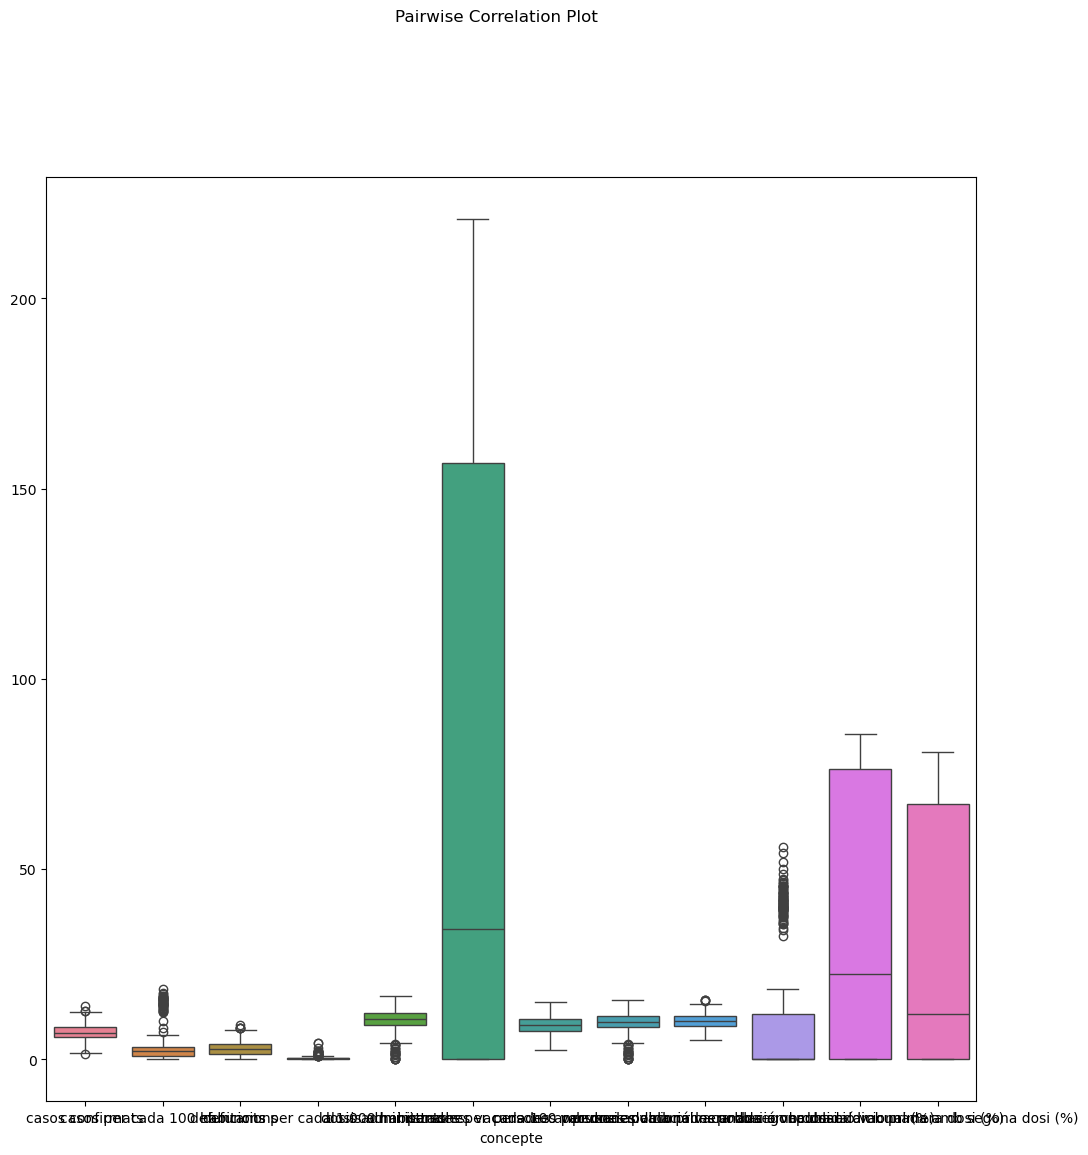

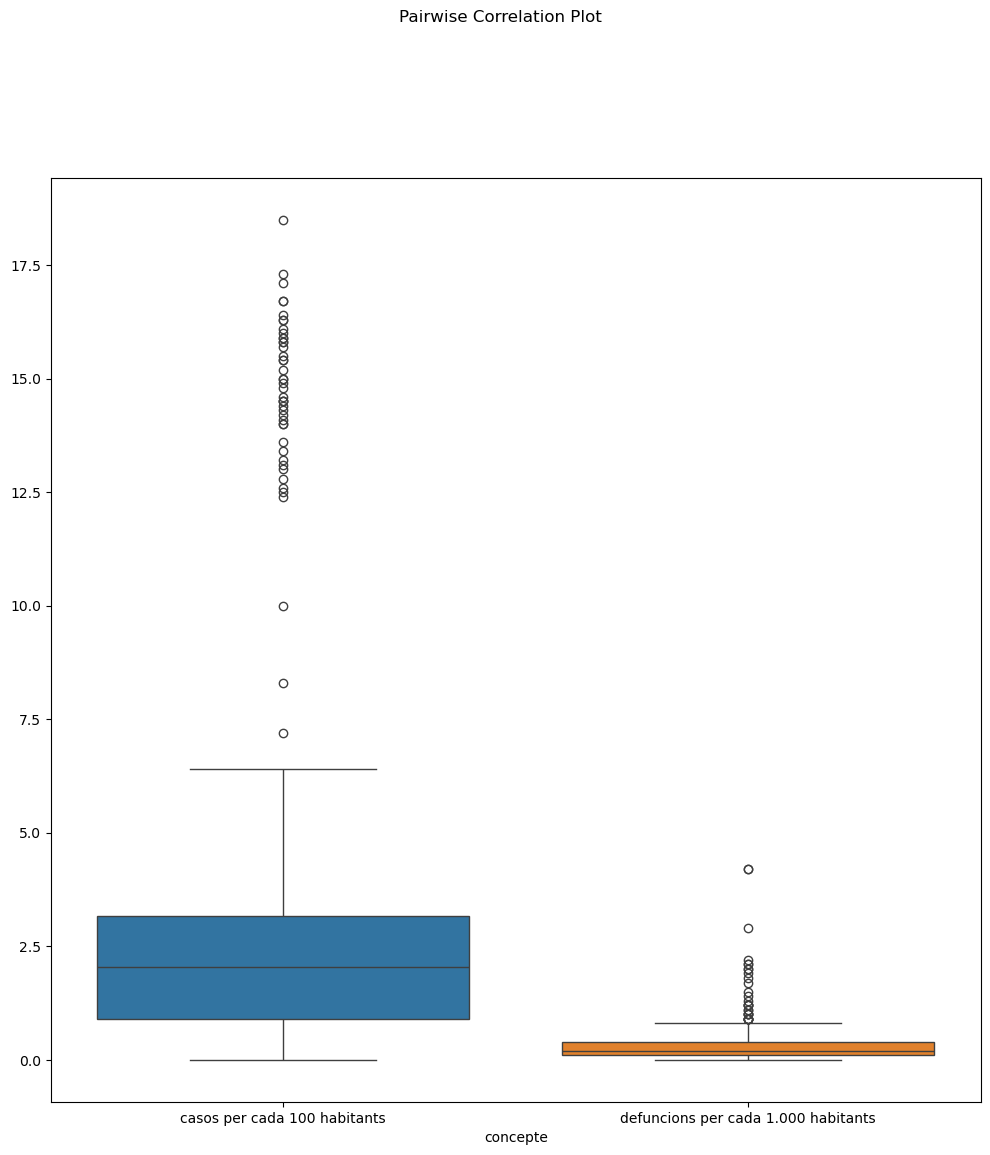

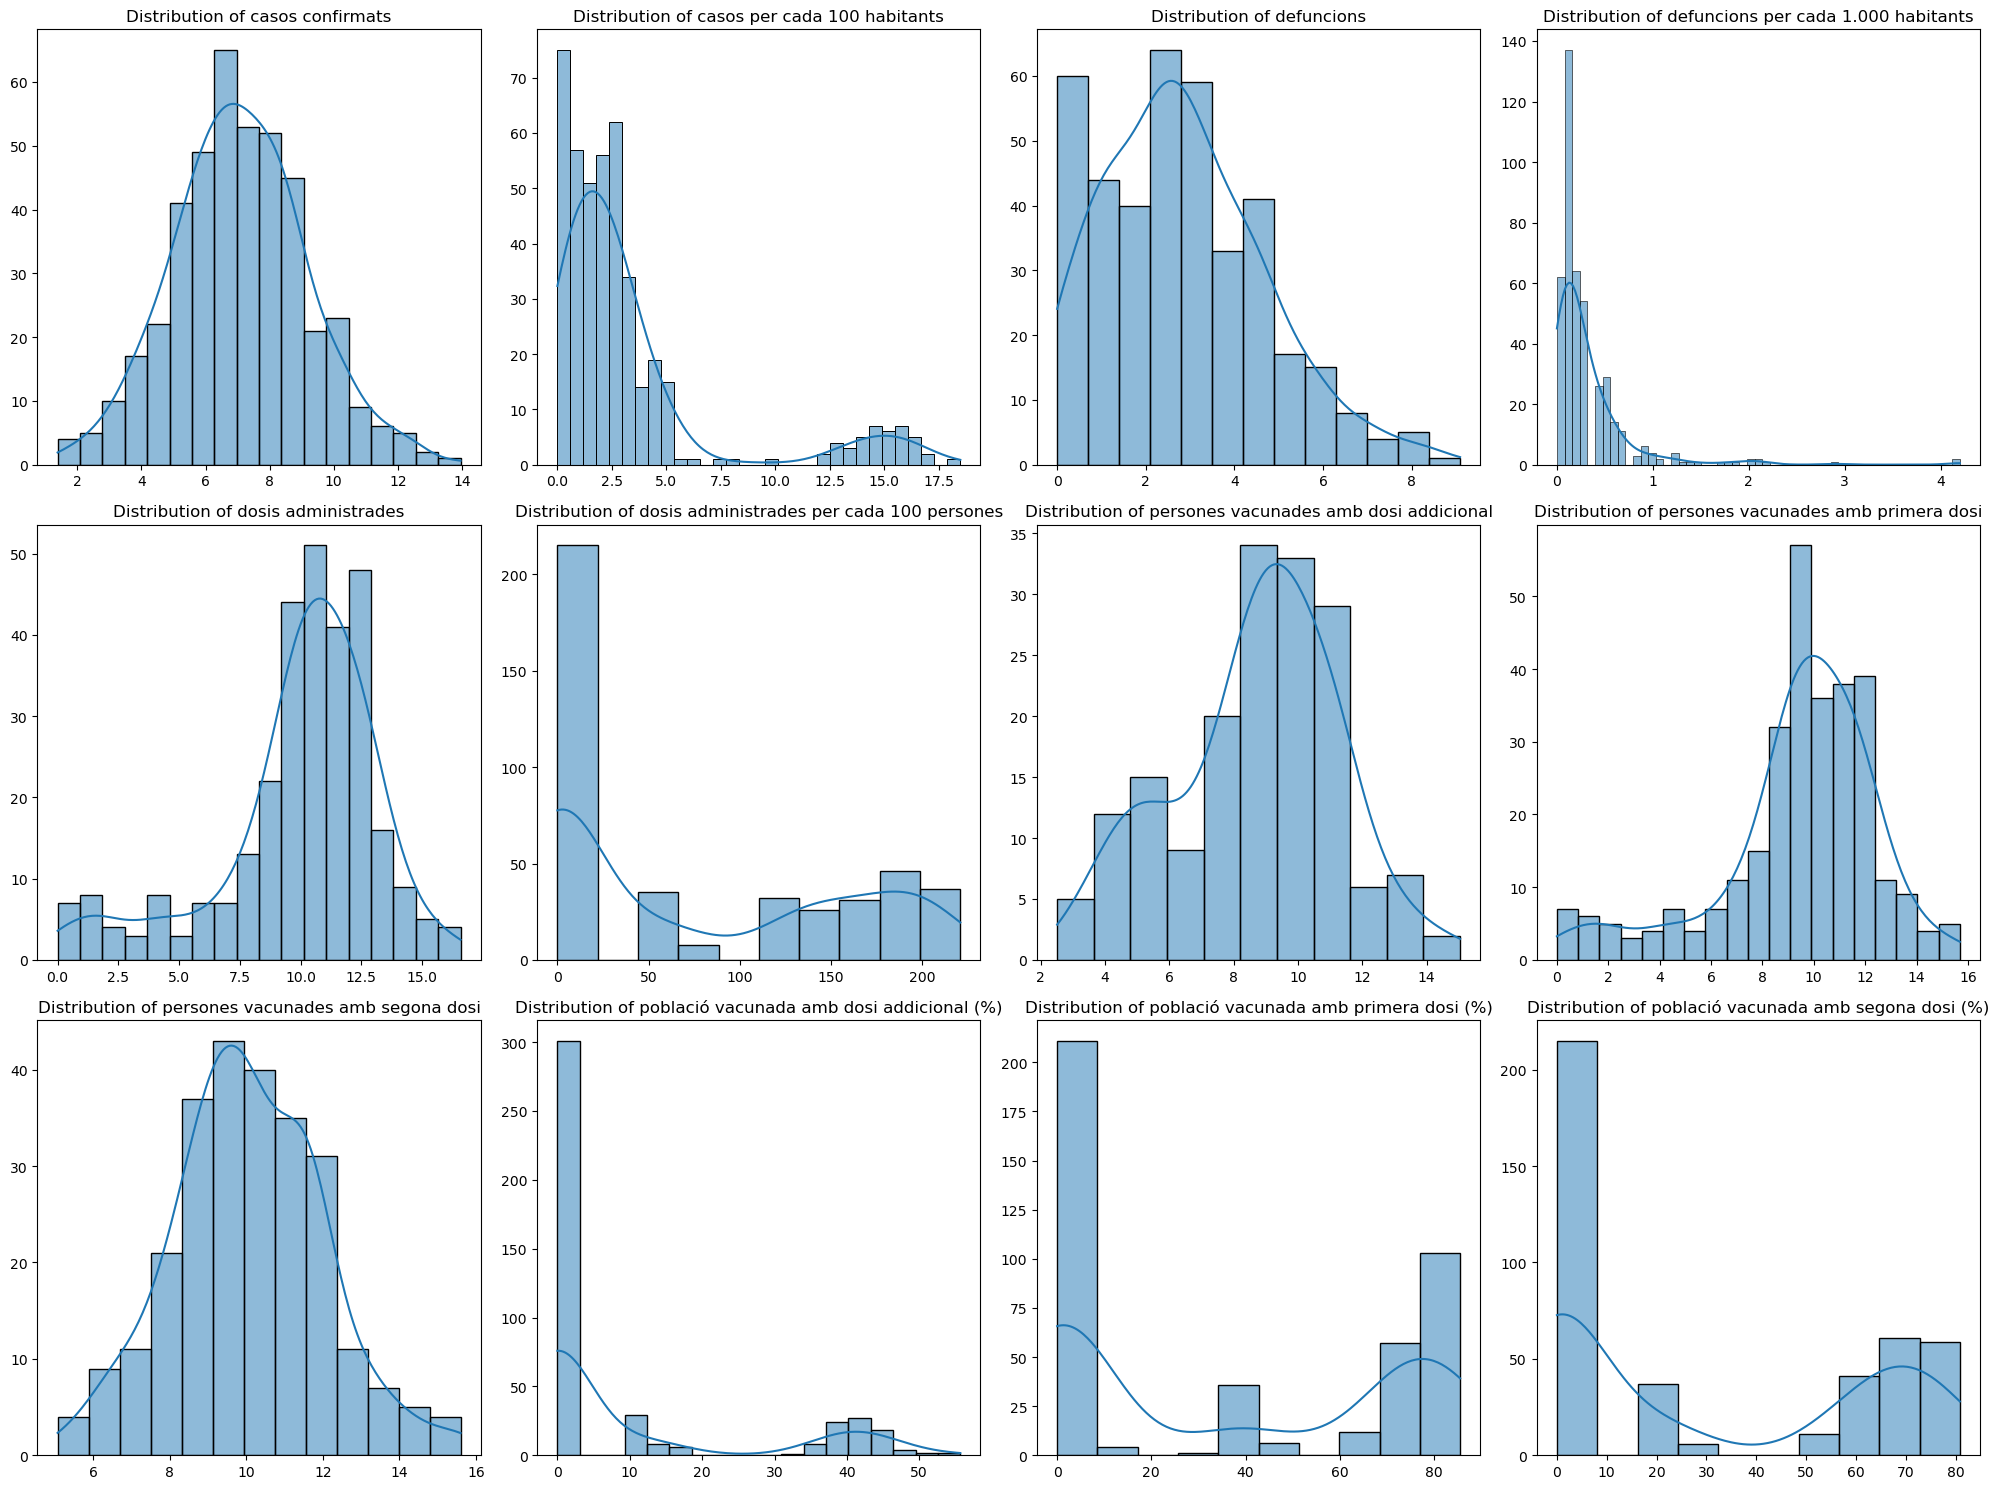

In [13]:
df_comarques_trimestral_total["casos confirmats"] = np.log(df_comarques_trimestral_total["casos confirmats"])
df_comarques_trimestral_total["defuncions"] = np.log(df_comarques_trimestral_total["defuncions"])
df_comarques_trimestral_total["dosis administrades"] = np.log(df_comarques_trimestral_total["dosis administrades"])
df_comarques_trimestral_total["persones vacunades amb dosi addicional"] = np.log(df_comarques_trimestral_total["persones vacunades amb dosi addicional"])
df_comarques_trimestral_total["persones vacunades amb primera dosi"] = np.log(df_comarques_trimestral_total["persones vacunades amb primera dosi"])
df_comarques_trimestral_total["persones vacunades amb segona dosi"] = np.log(df_comarques_trimestral_total["persones vacunades amb segona dosi"])

do_plots_exploration()

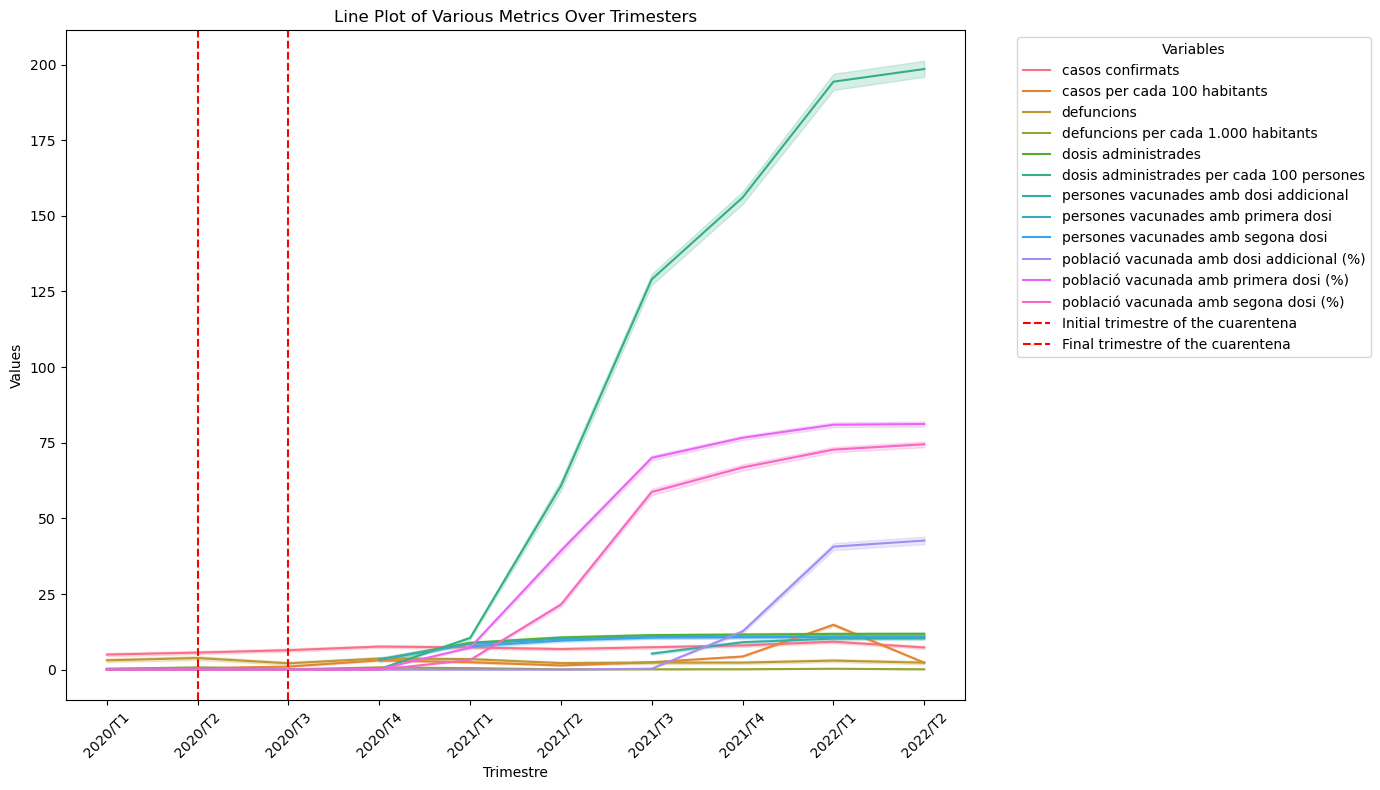

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def do_plots_line_exploration(colnames, exponential=False):
    
    df_comarques_trimestral_total['trimestre'] = pd.Categorical(df_comarques_trimestral_total['trimestre'], categories=sorted(df_comarques_trimestral_total['trimestre'].unique()), ordered=True)
    
    df_long = pd.melt(df_comarques_trimestral_total, id_vars=['comarques i Aran', 'trimestre'], 
                      value_vars=colnames, 
                      var_name='Variable', value_name='Value')
    
    plt.figure(figsize=(14, 8))
    if(exponential):
        df_long["Value"]=np.exp(df_long["Value"])
    sns.lineplot(data=df_long, x='trimestre', y='Value', hue='Variable')
    plt.xticks(rotation=45)
    plt.axvline(x='2020/T2', color='red', linestyle='--', label='Initial trimestre of the cuarentena')
    plt.axvline(x='2020/T3', color='red', linestyle='--', label='Final trimestre of the cuarentena')
    plt.title('Line Plot of Various Metrics Over Trimesters')
    plt.xlabel('Trimestre')
    plt.ylabel('Values')
    plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

do_plots_line_exploration(['casos confirmats', 'casos per cada 100 habitants', 
                                  'defuncions', 'defuncions per cada 1.000 habitants', 
                                  'dosis administrades', 'dosis administrades per cada 100 persones', 
                                  'persones vacunades amb dosi addicional', 'persones vacunades amb primera dosi', 
                                  'persones vacunades amb segona dosi', 
                                  'població vacunada amb dosi addicional (%)', 
                                  'població vacunada amb primera dosi (%)', 
                                  'població vacunada amb segona dosi (%)'])


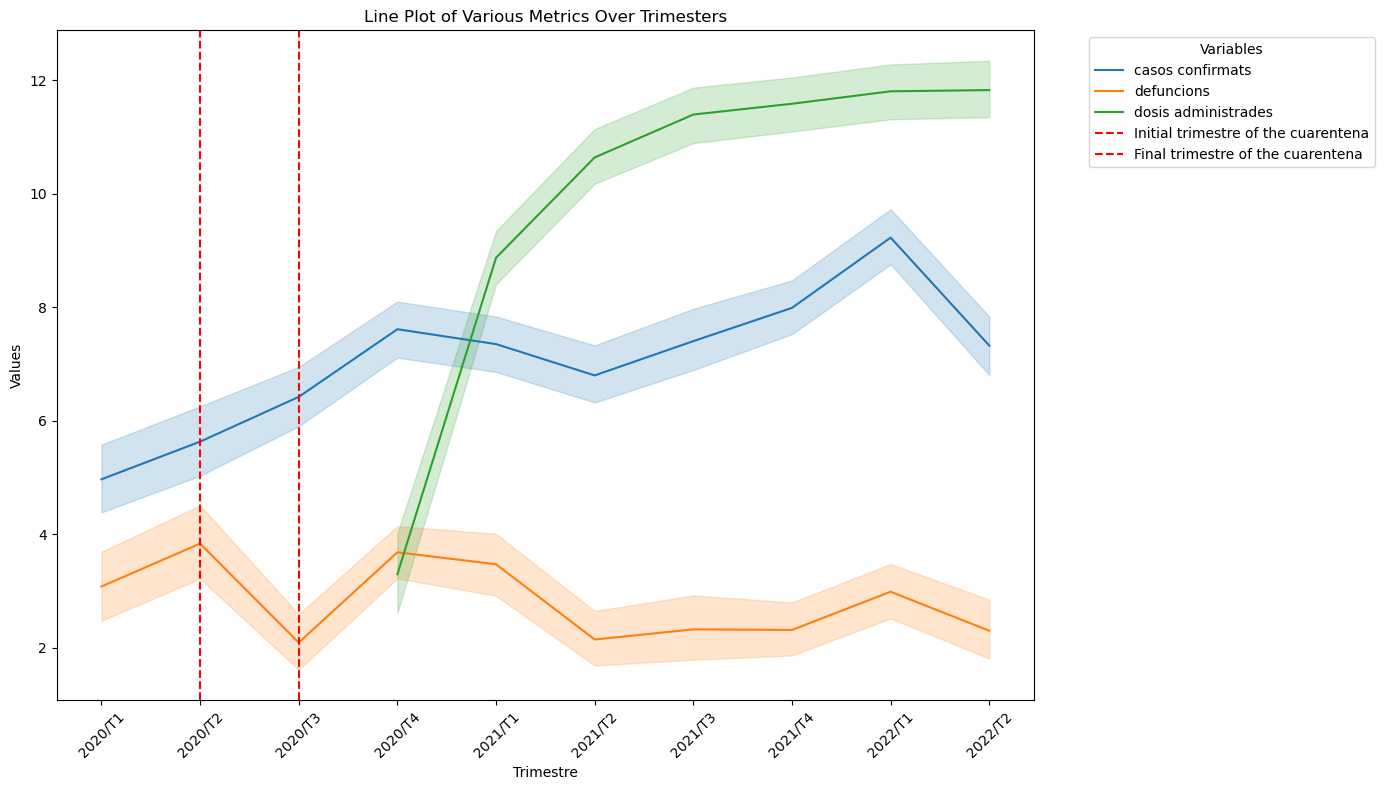

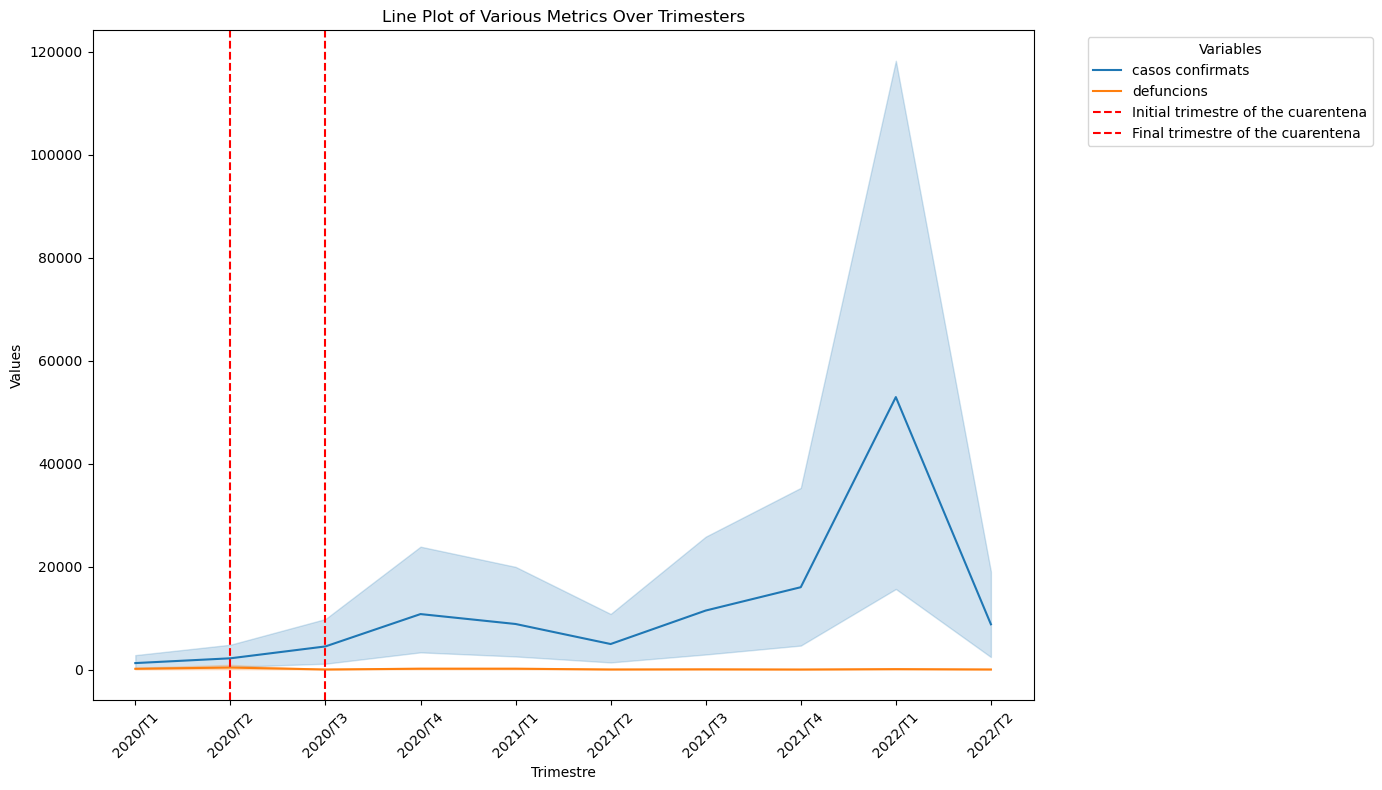

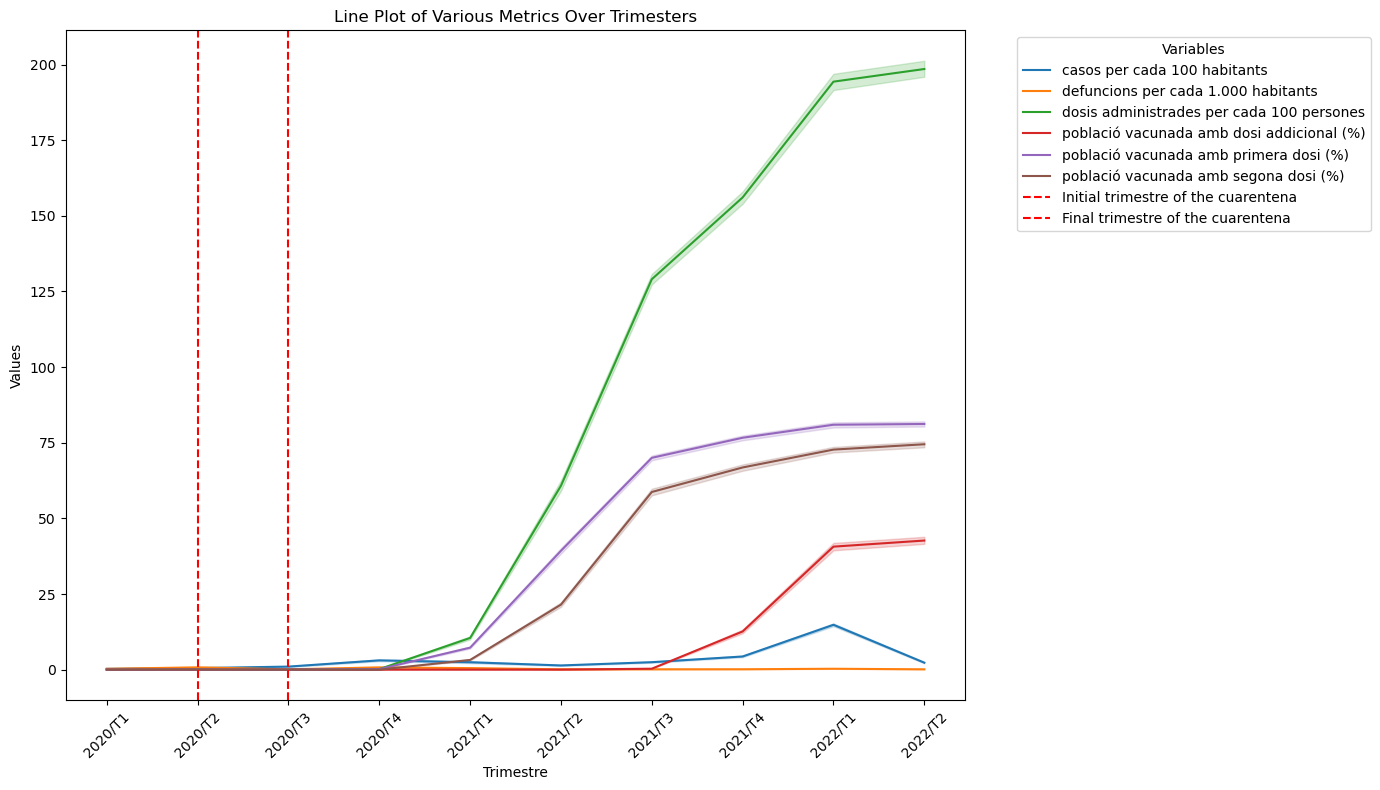

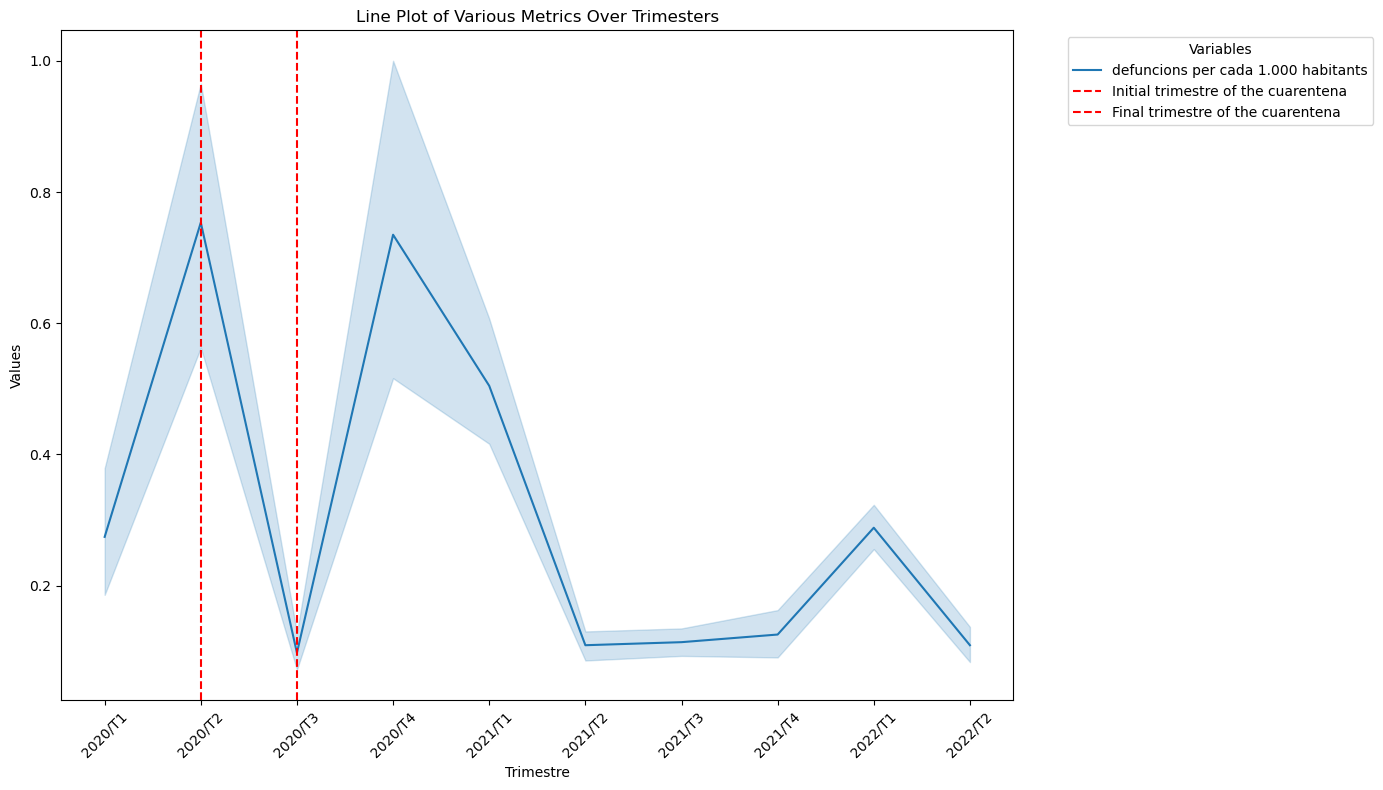

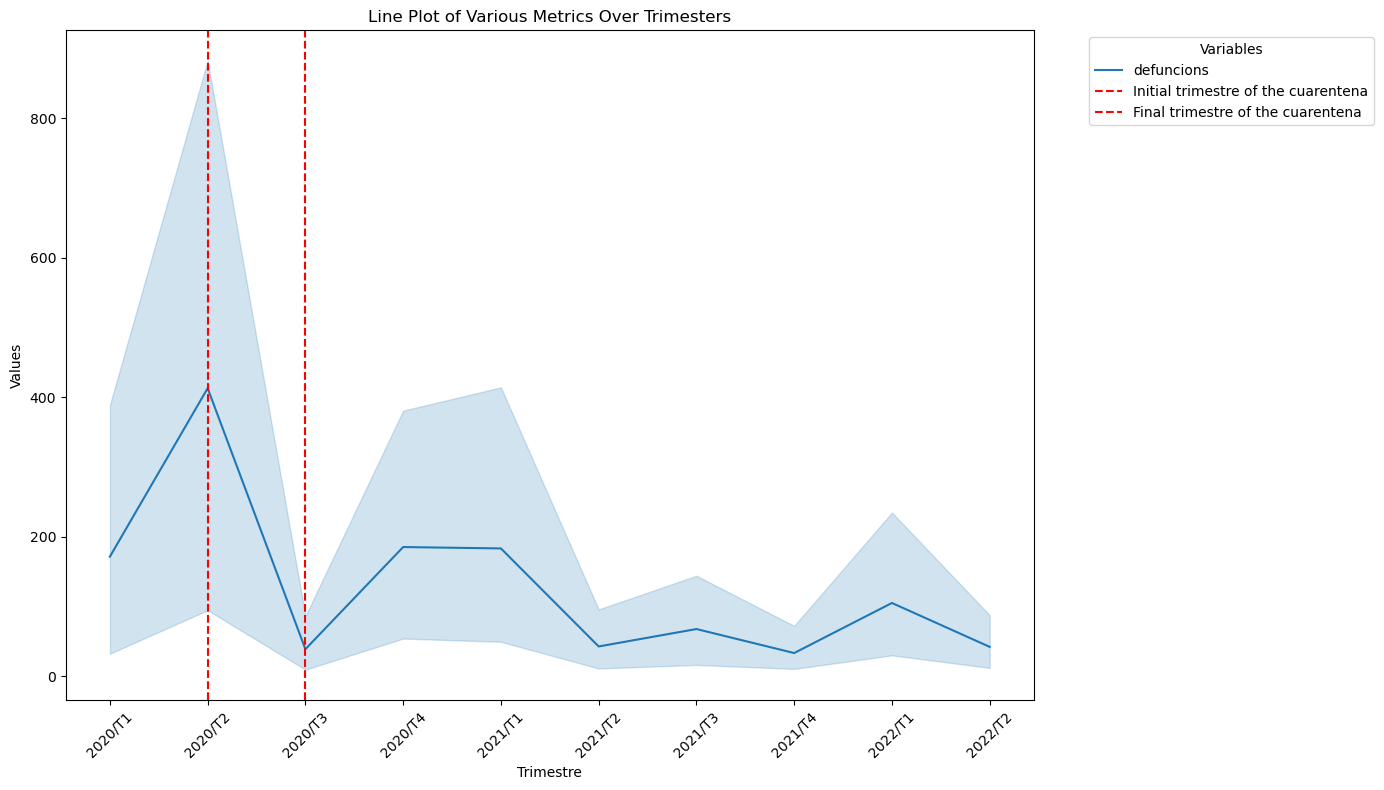

In [15]:
do_plots_line_exploration(['casos confirmats',
                                  'defuncions',
                                  'dosis administrades'])

do_plots_line_exploration(['casos confirmats',
                                  'defuncions'], True)

do_plots_line_exploration(['casos per cada 100 habitants', 
                                  'defuncions per cada 1.000 habitants', 
                                  'dosis administrades per cada 100 persones', 
                                  'població vacunada amb dosi addicional (%)', 
                                  'població vacunada amb primera dosi (%)', 
                                  'població vacunada amb segona dosi (%)'])

do_plots_line_exploration(['defuncions per cada 1.000 habitants'])
do_plots_line_exploration(['defuncions'], True)

## Stan

In [16]:
df_casos_comarques_trimestral_total = df_casos_comarques_trimestral.drop(columns=['estat'])[df_casos_comarques_trimestral["sexe"] == "total"]
df_casos_municipi_trimestral_total = df_casos_municipi_trimestral.drop(columns=['estat'])[df_casos_municipi_trimestral["sexe"] == "total"]
df_defuncions_comarques_trimestral_total = df_defuncions_comarques_trimestral.drop(columns=['estat'])[df_defuncions_comarques_trimestral["sexe"] == "total"]
df_vacunes_comarques_mensual_total = df_vacunes_comarques_mensual.drop(columns=['estat'])[df_vacunes_comarques_mensual["sexe"] == "total"]

reorder_quarter_df(df_casos_comarques_trimestral_total, 'trimestre')
reorder_quarter_df(df_casos_municipi_trimestral_total, 'trimestre')
reorder_quarter_df(df_defuncions_comarques_trimestral_total, 'trimestre')
reorder_quarter_df(df_vacunes_comarques_mensual_total, 'mes')

df_vacunes_comarques_trimestral_total = parse_date_to_quarter(df_vacunes_comarques_mensual_total, ["comarques i Aran", "mes"])
df_vacunes_comarques_trimestral_total.rename(columns={'mes': 'trimestre'}, inplace=True)

df_casos_comarques_trimestral_total = transform_by_concepte(df_casos_comarques_trimestral_total, ["comarques i Aran", "trimestre"])
df_casos_municipi_trimestral_total = transform_by_concepte(df_casos_municipi_trimestral_total, ["municipis", "trimestre"])
df_defuncions_comarques_trimestral_total = transform_by_concepte(df_defuncions_comarques_trimestral_total, ["comarques i Aran", "trimestre"])
df_comarques_trimestral_total = pd.merge(df_casos_comarques_trimestral_total, 
                                                     df_defuncions_comarques_trimestral_total, 
                                                     on=['comarques i Aran', 'trimestre'], how='outer')


merge_columns = df_vacunes_comarques_trimestral_total.columns.difference(df_comarques_trimestral_total.columns)

df_comarques_trimestral_total = pd.merge(df_comarques_trimestral_total, 
                                                     df_vacunes_comarques_trimestral_total, 
                                                     on=['comarques i Aran', 'trimestre'], how='left').round(2)

df_comarques_trimestral_total[merge_columns] = df_comarques_trimestral_total[merge_columns].fillna(0)

In [33]:
import stan
import numpy as np



N = len(df_comarques_trimestral_total)
K = len(df_comarques_trimestral_total.columns) - 8

df_comarques_trimestral_total_stan = df_comarques_trimestral_total.copy()
df_comarques_trimestral_total_stan['trimestre'] = pd.factorize(df_comarques_trimestral_total['trimestre'])[0]
X = df_comarques_trimestral_total_stan.drop(['comarques i Aran', 'defuncions', 
                                            'persones vacunades amb dosi addicional', 
                                            'casos confirmats', 
                                            'dosis administrades', 
                                            'defuncions per cada 1.000 habitants', 
                                            'persones vacunades amb primera dosi', 
                                            'persones vacunades amb segona dosi'], axis=1).values
y = df_comarques_trimestral_total_stan['defuncions'].values


data_linear_model = {
    'N': N,
    'K': K,
    'x': X,
    'y': y
}

stan_linear_model = """
data {
  int<lower=0> N;   // number of data items
  int<lower=0> K;   // number of predictors
  matrix[N, K] x;   // predictor matrix
  vector[N] y;      // outcome vector
}
parameters {
  real alpha;           // intercept
  vector[K] beta;       // coefficients for predictors
  real<lower=0> sigma;  // error scale
}
model {
  y ~ normal(x * beta + alpha, sigma);  // likelihood
  alpha ~ gamma(40, 12);
  beta ~ normal(0, 10);
  sigma ~ normal(0, 10000);
}

"""
linear_model = stan.build(stan_linear_model, data=data_linear_model)

linear_posterior = linear_model.sample(num_chains=3, num_samples=5000)



Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_j2w83m9_/model_jjudm6hn.stan', line 17, column 20: Argument
    10000 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_j2w83m9_/model_jjudm6hn.stan', line 15, column 20: Argument
    12 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_j2w83m9_/model_jjudm6hn.stan', line 15, column 16: Argument
    40 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_j2w83m9_/model_jjudm6hn.stan', line 15, column 2: Parameter
    alpha is given a gamma distribution, which has strictly positive support,
    but alpha was not constrained to be strictly positive.
Sampling:   0%
Sampling:   0% (1/18000)
Sampling:   0% (2/180

In [35]:
df_posterior = linear_posterior.to_frame()
print(df_posterior.describe().T)

                 count         mean        std          min          25%  \
parameters                                                                 
lp__           15000.0 -2958.622857   2.026400 -2971.671273 -2959.731105   
accept_stat__  15000.0     0.936546   0.087534     0.221676     0.909870   
stepsize__     15000.0     0.040571   0.004087     0.035118     0.035118   
treedepth__    15000.0     6.319333   0.607660     2.000000     6.000000   
n_leapfrog__   15000.0   100.185067  33.198366     3.000000    63.000000   
divergent__    15000.0     0.000000   0.000000     0.000000     0.000000   
energy__       15000.0  2962.647484   2.861068  2956.090569  2960.572489   
alpha          15000.0     3.367557   0.542617     1.708464     2.990091   
beta.1         15000.0    12.411047   8.738969   -18.676638     6.436595   
beta.2         15000.0     8.245232   6.677724   -16.909523     3.721556   
beta.3         15000.0    -0.535246   4.939963   -18.723414    -3.885345   
beta.4      

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'beta\n1'}>,
        <Axes: title={'center': 'beta\n2'}>],
       [<Axes: title={'center': 'beta\n3'}>,
        <Axes: title={'center': 'beta\n4'}>,
        <Axes: title={'center': 'beta\n5'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

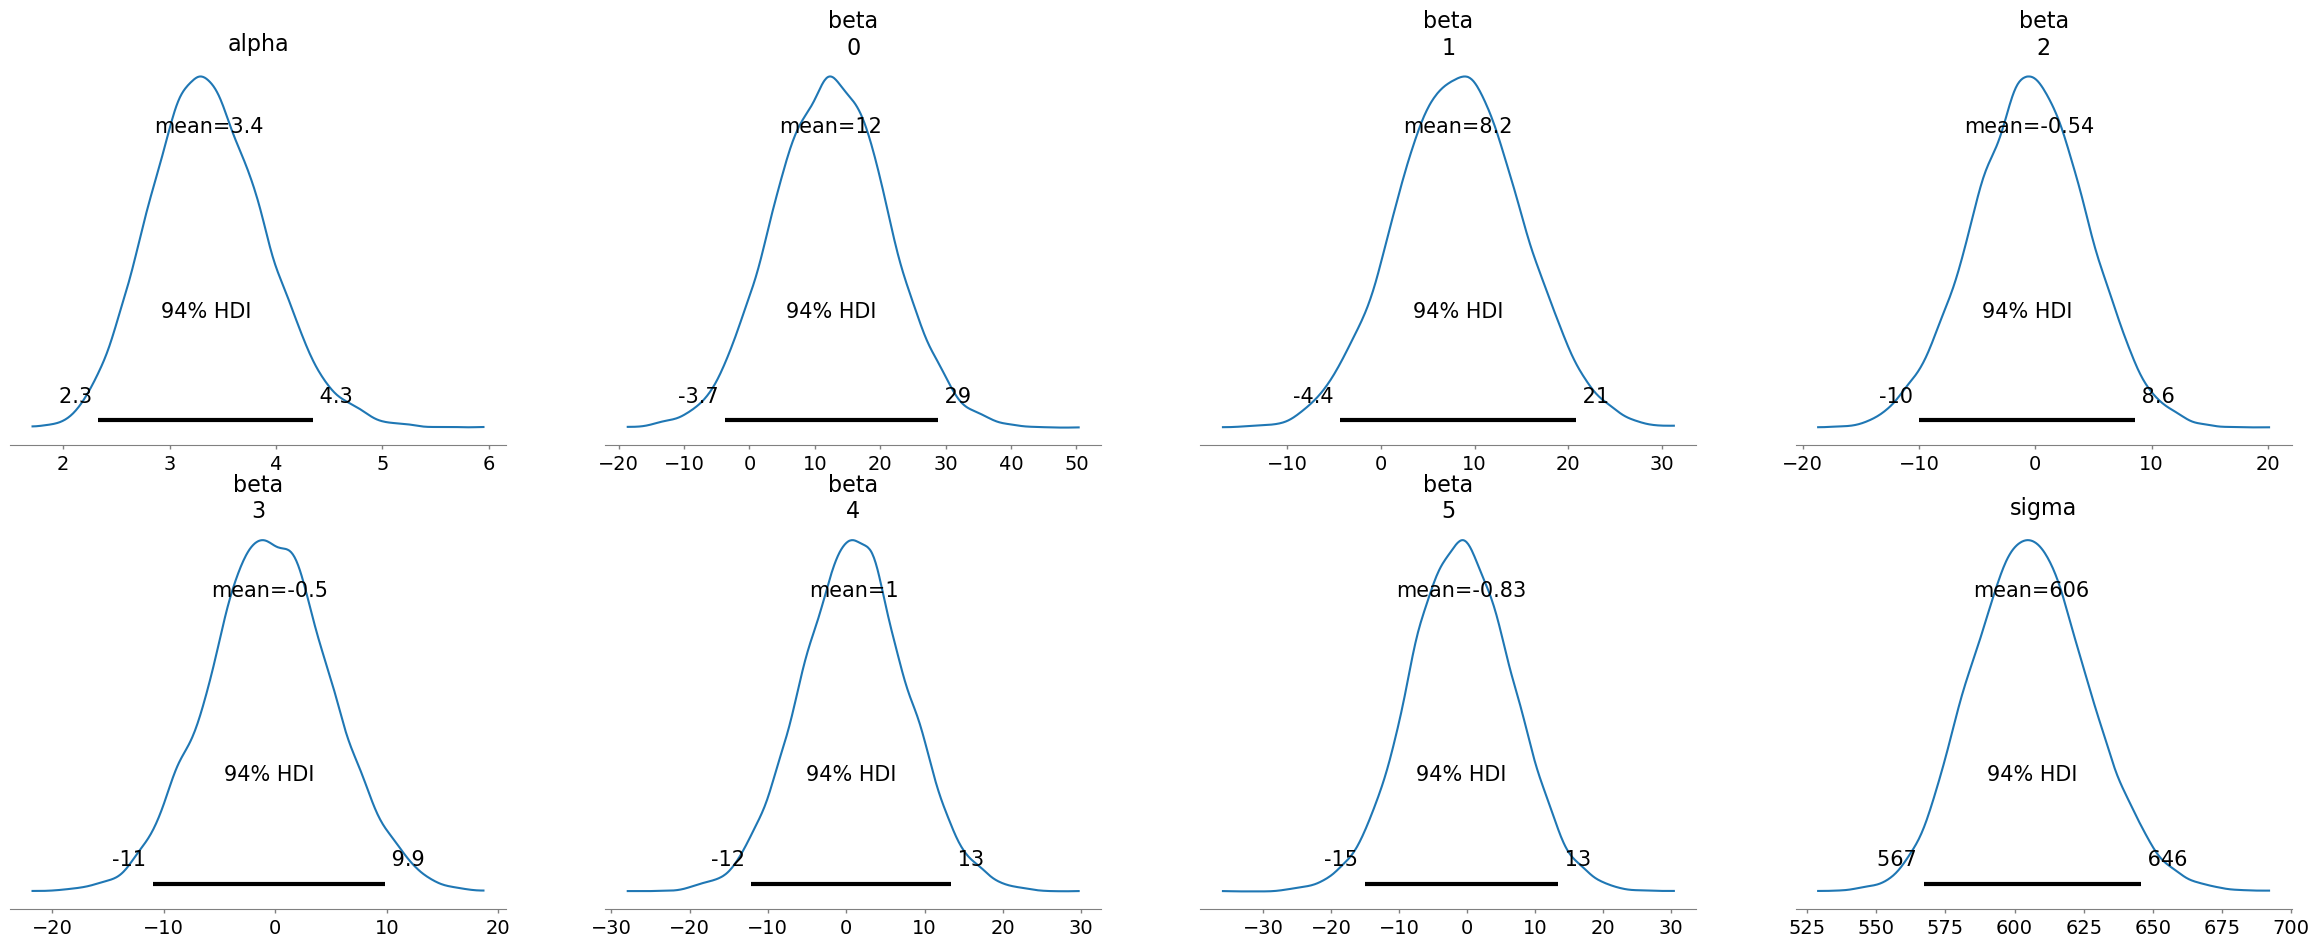

In [36]:
import arviz as az

bayes_plot = az.from_pystan(posterior=linear_posterior, posterior_model=linear_model)

az.plot_posterior(bayes_plot)

In [37]:
bayes_plot

Inference data with groups:
	> posterior
	> sample_stats

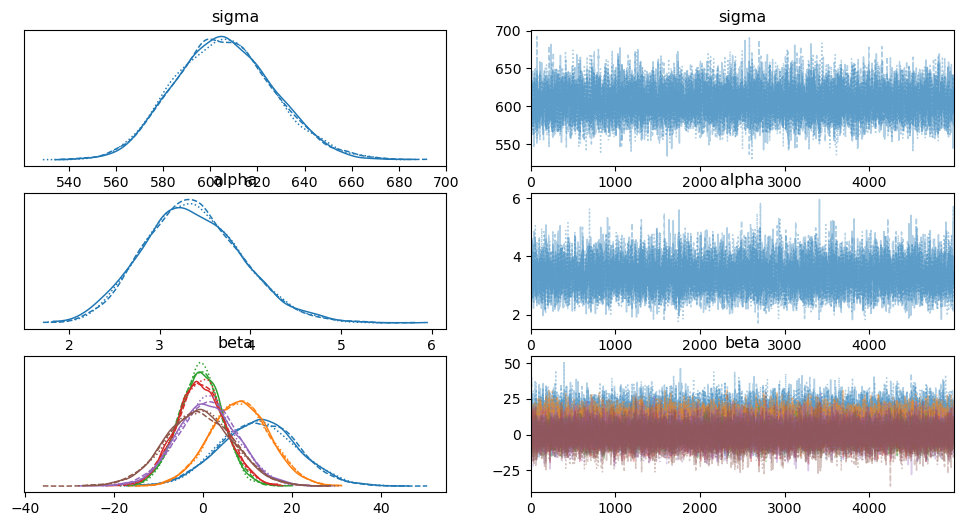

In [38]:
az.plot_trace(bayes_plot, var_names=("sigma", "alpha", "beta"))

plt.show()

In [30]:
df_comarques_trimestral_total[200:230]

concepte,comarques i Aran,trimestre,casos confirmats,casos per cada 100 habitants,defuncions,defuncions per cada 1.000 habitants,dosis administrades,dosis administrades per cada 100 persones,persones vacunades amb dosi addicional,persones vacunades amb primera dosi,persones vacunades amb segona dosi,població vacunada amb dosi addicional (%),població vacunada amb primera dosi (%),població vacunada amb segona dosi (%)
200,Garrotxa,2020/T1,200.0,0.3,27.0,0.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
201,Garrotxa,2020/T2,558.0,1.0,70.0,1.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
202,Garrotxa,2020/T3,375.0,0.7,10.0,0.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
203,Garrotxa,2020/T4,1847.0,3.2,39.0,0.7,45.00,0.10,0.00,45.00,0.00,0.00,0.10,0.00
204,Garrotxa,2021/T1,3039.0,5.3,60.0,1.0,6034.33,10.50,0.00,4362.00,1672.33,0.00,7.57,2.90
205,Garrotxa,2021/T2,1416.0,2.5,18.0,0.3,34397.67,59.83,0.00,22044.33,12353.33,0.00,38.33,21.47
206,Garrotxa,2021/T3,1190.0,2.1,4.0,0.1,73159.33,127.23,115.67,40324.67,32719.00,0.20,70.13,56.93
207,Garrotxa,2021/T4,2908.0,5.1,12.0,0.2,89197.33,155.17,7196.00,44654.33,37347.00,12.53,77.70,64.97
208,Garrotxa,2022/T1,8330.0,14.5,27.0,0.5,111199.00,193.40,22668.67,47251.67,41267.00,39.43,82.17,71.77
209,Garrotxa,2022/T2,1357.0,2.4,10.0,0.2,113867.00,198.07,23837.67,47500.00,42470.67,41.47,82.63,73.90


Notes:

- hem de pensar amb indicadors clau:
  -  Infeccions COVID
  -  Defuncions COVID
    -  Defuncions majors 60 anys
    -  Defuncions menors 60 anys
  -  Cobertura territorial
  -  Vacunacio
  -  Capacitat hospitalaria
  -  Cost de la vida / aliments
  -  Mobilitat nacional
  -  Productivitat
  -  Pobresa
  -  Altres pacients medics
  -  Morts altres pacients medics
 
- Models a realitzar:
  - Regresio lineal chorra
  - ARMA (1,1) (Suposo que el de la docu de Stan ya sirve?)
  - Model jerarquic "custom" A.k.a. Poisson-"Nabil" model
 

Confinamiento por la pandemia de COVID-19 en España
Histórico
Fecha de inicio	Estado de alarma: Entre el 14 de marzo y el 21 de junio de 2020
Fecha de fin	21 de junio de 2020
Duración	Estado de alarma: 100 días o 3 meses y 8 días

## Bibliography

### Datasets
https://analisi.transparenciacatalunya.cat/Salut/Registre-de-defuncions-per-COVID-19-a-Catalunya-pe/uqk7-bf9s/about_data

https://analisi.transparenciacatalunya.cat/Salut/Dades-di-ries-de-COVID-19-per-comarca/c7sd-zy9j/about_data

https://www.idescat.cat/dades/obertes/covid

https://ourworldindata.org/coronavirus

https://www.idescat.cat/dades/obertes/ist

https://www.idescat.cat/dades/micro/

https://www.ine.es/experimental/movilidad/experimental_em4.htm#tablas_resultados --- https://www.ine.es/jaxiT3/Datos.htm?t=48252#_tabs-tabla